In [2]:
import numpy as np
import math

## How it works

In [4]:
x1 = .47
x2 = 1
def sgm(v):
    return 1/(1+math.exp(-v))
             
# the weights that we got    
y = 5.060867 * x1 + 1.4086502 * x2 + -2.9137027
print(sgm(y))


0.7054848786651786


In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(x))

In [19]:
def log_loss(y_pred,y_true):
    epsilon = 1e-15
    changed_y_pred = [max(i,epsilon) for i in y_pred]
    changed_y_pred = [min(i,1-epsilon) for i in changed_y_pred]
    changed_y_pred = np.array(changed_y_pred)
    return -np.mean(y_true * np.log(changed_y_pred) + (1-y_true) * np.log(1-changed_y_pred) )




In [90]:
a = np.array([[1], [2]]).reshape(2,1)
b = np.array([[5],[10]])
np.column_stack((a, b))

array([[ 1,  5],
       [ 2, 10]])

## NOTE: It's not fully correct because of the data, but the function works!

In [198]:
area = np.array([[1800],[1170],[3700],[3300],[1440]])
bedrooms = np.array([[3],[2],[5],[4],[3]])
y_true =np.array([[82.0],[38.0],[167.0],[155.0],[62.0]])

X = np.column_stack((area, bedrooms))

from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_X =  sx.fit_transform(X)
scaled_Y = sy.fit_transform(y_true)

def gradient_descent(X,y_true, epochs=500):
    w = np.ones(shape=X.shape[1])
    bias = 0
    rate = 0.01
    n = X.shape[0]
    
    y_true = y_true.reshape(y_true.shape[0],)
    
    cost_list = []
    epoch_list = []
    for epoch in range(epochs):
        y_predicted = np.dot(X,w) + bias
        
        w_gradient = -(2/n) * (X.T.dot(y_true-y_predicted))
        b_gradient = -(2/n) * np.sum(y_true-y_predicted)
        w = w - rate * w_gradient
        bias = bias - rate * b_gradient
        cost = np.mean(np.square(y_true-y_predicted)) # mean squared error
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
            # print("[INFO]  Epochs: {}.cost:{} . w:{} bias:{}".format(epoch+1,cost,w,bias))
        # basically the same as this - y_predicted = w1 * area + w2 * bedrooms + bias
    return (y_predicted,w,bias,epoch_list,cost_list)

def predict(X,y, w,bias):
    scaled_X =sx.transform(X)
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + bias
    return sy.inverse_transform([np.dot(scaled_X,w) + bias]) # transform back
    
(y_predicted,w,bias,epoch_list,cost_list) = gradient_descent(scaled_X,scaled_Y)
print(w,bias)
# We trained our model with scaled values, but we want to predict using normal values
print(predict(X,y_true, w,bias),end=" = prediction")
# our predicted values are kinda close, but not the best


[0.57544831 0.58924586] -0.05061072018142457
[[ 75.29364451  31.4712171  181.71676518 144.64277706  64.73086997]] = prediction

## Oh no, its another dreaded comparision alert
1. We can rewrite this dot product - **np.dot(X,w) + bias**
1. As this **np.dot(w, X.T) + bias**
1. NOTE: we can't simply write np.do(w,X) because they aren't the same shape, so we have to transpose it first. **IMO first variant is simpler**
1. And all of this is just w1 * area + w2 * bedrooms + bias
1. But we are utilizing numpy incredibly powerful and fast vector operations that lets us multiple 2 matrices rather than writing dreaded double for loop

## Graph

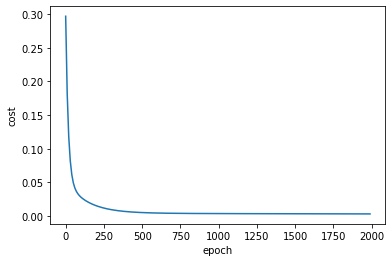

In [191]:
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

## Our cost values don't seem to be decreasing that much after 400 epochs, so we can kinda assume that around 400-500 epochs is fine and won't affect the plot much further